# Pitch Histogams
## Pitch Speed

In [44]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [52]:
import os
import numpy as np
import json

In [53]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [54]:
# Get Pitch Types
pitch_type_data = []
pitch_type_data = [cur_data['summary_acts']['pitch']['type'] for cur_data in data if cur_data['summary_acts']['pitch']['type']]
pitch_type_types = list(set(pitch_type_data))
print(pitch_type_types)

['Slider', 'Curveball', 'Cutter', 'FourSeamFastball', 'Changeup', 'Sinker']


In [55]:
pitch_speed = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['speed']['mph'])

In [56]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly

In [57]:
plotly.offline.init_notebook_mode(connected=True)

In [58]:
# Calculate the minimum and maximum speed
min_speed = min(min(speed) for speed in pitch_speed)
max_speed = max(max(speed) for speed in pitch_speed)

# Create subplots
fig = make_subplots(rows=len(pitch_type_types), cols=1, subplot_titles=pitch_type_types)

# Add histograms to subplots
for i in range(len(pitch_type_types)):
    hist = go.Histogram(
        x=pitch_speed[i],
        nbinsx=6,
        marker_color='red',
        marker_line_color='black',
        marker_line_width=1
    )

    fig.add_trace(hist, row=i+1, col=1)

    # Update x and y axis labels for each subplot
    fig.update_xaxes(title_text="Speed (mph)", row=i+1, col=1)
    fig.update_yaxes(title_text="Frequency", row=i+1, col=1)

# Update layout
fig.update_layout(
    height=1000,  # Adjust height as needed
    width=500,   # Adjust width as needed
    title_text='Pitch Initial Speed Frequency',
    showlegend=False
)
fig.show()

In [59]:
# Save the plot as a PNG file
# fig.write_image("Pitch Initial Speed Frequency.png", engine='kaleido')

In [60]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))

# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Speed Frequency')
fig.update_xaxes(title_text="Speed (mph)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Speed Frequency Histogram.png", engine='kaleido')

## Pitch Spin Histogram

In [61]:
pitch_spin = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [62]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))
    
# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Spin Frequency')
fig.update_xaxes(title_text="Spin (rpm)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Spin Frequency Histogram.png", engine='kaleido')

# Pitch Density Heatmap
## Pitch type and Result

In [63]:
import plotly.express as px
import pandas as pd

In [64]:
pitch_type_data = []
pitch_result_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [65]:
pitch_type_types = list(set(pitch_type_data))
pitch_result_types = list(set(pitch_result_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Results:", pitch_result_types)

Pitch Types: ['Slider', 'Curveball', 'Cutter', 'FourSeamFastball', 'Changeup', 'Sinker']
Pitch Results: ['Strike', 'Ball', 'HitIntoPlay']


In [66]:
pitch_matrix = np.zeros([len(pitch_type_types), len(pitch_result_types)])
for i in range(len(pitch_type_data)):
    pitch_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_result_types.index(pitch_result_data[i])] += 1
# print(pitch_matrix)

#convert to dictionary
type_result_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_result_types):
    type_result_dict[outcome] = pitch_matrix[:, i].tolist()
# print(type_result_dict)

#Make dataframe
type_result_df = pd.DataFrame(type_result_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_df = pd.melt(type_result_df, id_vars='Pitch Type', var_name='Outcome', value_name='Count')
print(melted_df)

          Pitch Type      Outcome  Count
0             Slider       Strike   23.0
1          Curveball       Strike    7.0
2             Cutter       Strike    6.0
3   FourSeamFastball       Strike    9.0
4           Changeup       Strike    4.0
5             Sinker       Strike   30.0
6             Slider         Ball   21.0
7          Curveball         Ball    8.0
8             Cutter         Ball   10.0
9   FourSeamFastball         Ball    6.0
10          Changeup         Ball    6.0
11            Sinker         Ball   32.0
12            Slider  HitIntoPlay    9.0
13         Curveball  HitIntoPlay    1.0
14            Cutter  HitIntoPlay    2.0
15  FourSeamFastball  HitIntoPlay    9.0
16          Changeup  HitIntoPlay    8.0
17            Sinker  HitIntoPlay   10.0


In [67]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_df.pivot(index='Pitch Type', columns='Outcome', values='Count'),
                x=melted_df['Outcome'].unique(),
                y=melted_df['Pitch Type'].unique(),
                labels=dict(x='Outcome', y='Pitch Type', color='Count'),
                title='Pitch Type Outcome Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Outcomes.png", engine='kaleido')

## Pitch Type and Action

In [68]:
pitch_type_data = []
pitch_action_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['action']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_action_data.append(cur_data['summary_acts']['pitch']['action'])

In [69]:
pitch_type_types = list(set(pitch_type_data))
pitch_action_types = list(set(pitch_action_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Action:", pitch_action_types)

Pitch Types: ['Slider', 'Curveball', 'Cutter', 'FourSeamFastball', 'Changeup', 'Sinker']
Pitch Action: ['HitByPitch', 'Called', 'Foul', 'BallInDirt']


In [70]:
pitch_type_action_matrix = np.zeros([len(pitch_type_types), len(pitch_action_types)])
for i in range(len(pitch_type_data)):
    pitch_type_action_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_action_types.index(pitch_action_data[i])] += 1
# print(pitch_type_action_matrix)

#convert to dictionary
type_action_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_action_types):
    type_action_dict[outcome] = pitch_type_action_matrix[:, i].tolist()
# print(type_action_dict)

#Make dataframe
type_action_df = pd.DataFrame(type_action_dict)
# print(type_action_df)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_type_action_df = pd.melt(type_action_df, id_vars='Pitch Type', var_name='Pitch Action', value_name='Count')
print(melted_type_action_df)

          Pitch Type Pitch Action  Count
0             Slider   HitByPitch    1.0
1          Curveball   HitByPitch    0.0
2             Cutter   HitByPitch    0.0
3   FourSeamFastball   HitByPitch    0.0
4           Changeup   HitByPitch    0.0
5             Sinker   HitByPitch    1.0
6             Slider       Called   27.0
7          Curveball       Called   11.0
8             Cutter       Called   13.0
9   FourSeamFastball       Called   12.0
10          Changeup       Called    9.0
11            Sinker       Called   44.0
12            Slider         Foul   11.0
13         Curveball         Foul    2.0
14            Cutter         Foul    2.0
15  FourSeamFastball         Foul    3.0
16          Changeup         Foul    0.0
17            Sinker         Foul   16.0
18            Slider   BallInDirt    2.0
19         Curveball   BallInDirt    1.0
20            Cutter   BallInDirt    0.0
21  FourSeamFastball   BallInDirt    0.0
22          Changeup   BallInDirt    0.0
23            Si

In [71]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_type_action_df.pivot(index='Pitch Type', columns='Pitch Action', values='Count'),
                x=melted_type_action_df['Pitch Action'].unique(),
                y=melted_type_action_df['Pitch Type'].unique(),
                labels=dict(x='Pitch Action', y='Pitch Type', color='Count'),
                title='Pitch Type Action Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Action Counts.png", engine='kaleido')

# Predictors
## Pitch Type Classification

In [72]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [73]:
combined_speed_spin = [list(item) for item in zip(pitch_speed_data, pitch_spin_data)]
print(len(combined_speed_spin))
print(len(pitch_type_data))

200
200


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(combined_speed_spin, pitch_type_data, test_size=0.2, random_state=42)

In [76]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [77]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x_scaled, train_y)

RandomForestClassifier(random_state=42)

In [78]:
pred_y = classifier.predict(test_x_scaled)

In [79]:
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


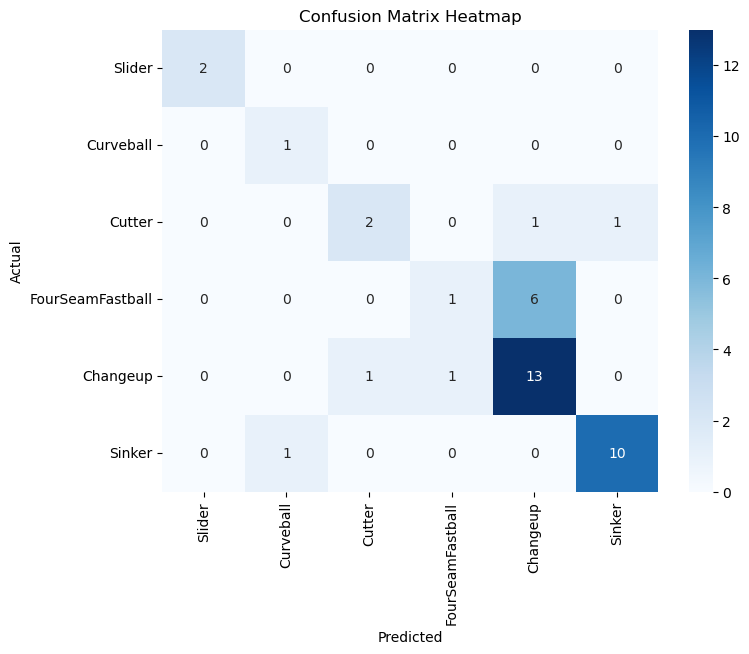

In [80]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

# get labels
pitch_type_data_options = list(set(pitch_type_data))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pitch_type_data_options, yticklabels=pitch_type_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Pitch Result Prediction
### Random Forest Classifier

In [81]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [82]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []
pitch_result_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [83]:
data = {
    'Type': pitch_type_data,
    'Speed': pitch_speed_data,
    'Spin': pitch_spin_data
}
df = pd.DataFrame(data)

In [84]:
#One-Hot Encoding to handle string data in type
df_encoded = pd.get_dummies(df, columns=['Type'])

In [85]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(df_encoded, pitch_result_data, test_size=0.2, random_state=42)

In [86]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [87]:
pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


### Logistic Regression

In [88]:
!pip install seaborn==0.13.0

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [91]:
classifier = LogisticRegression(random_state=42)
classifier.fit(train_x_scaled, train_y)

LogisticRegression(random_state=42)

In [92]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[[10  1  7]
 [ 3  3  2]
 [ 4  3  7]]


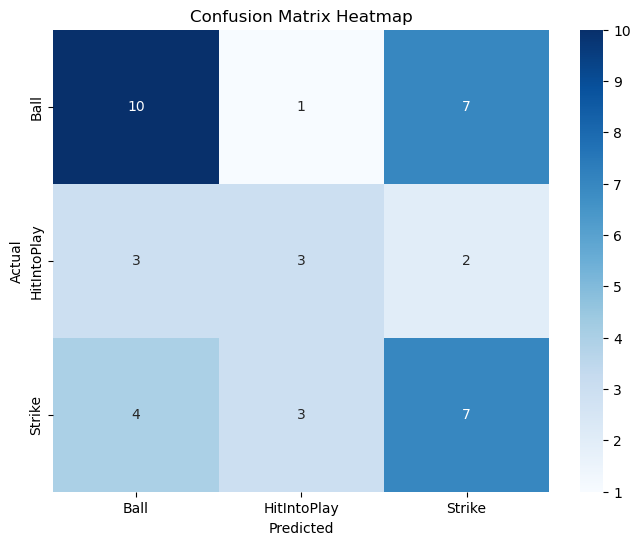

In [94]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)
print(conf_matrix)

# get labels
pitch_result_data_options = sorted(list(set(pitch_result_data)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=pitch_result_data_options,
            yticklabels=pitch_result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
classifier = DecisionTreeClassifier(random_state=15)
classifier.fit(train_x_scaled, train_y)

DecisionTreeClassifier(random_state=15)

In [97]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.47
